In [120]:
from coders import BitStream, WavStream
from coders import SimpleFSK as Coder
import scipy.io.wavfile

coder = Coder()

In [121]:
input_stream = BitStream(np.random.randint(2, size=20))
encoded = coder.encode(input_stream)
scipy.io.wavfile.write('test.wav', coder.rate.current, encoded)
read_rate, read = scipy.io.wavfile.read('test.wav')
noisy = np.random.normal(0, 1, len(read)) * 0.2 + read

Frequency map: [ 55.    55.    68.33  95.    55.    68.33  68.33  95.    95.    81.67]


In [122]:
wavstream = WavStream(noisy, read_rate, int(round(coder.rate.current * coder.symbol_duration.current)))
verification = input_stream.assymbolsize(2)
decoded = coder.decode(read_rate, wavstream)
check = verification == decoded

Main vars: 1000 10000 67 [ 55.    68.33  81.67  95.  ]
Filter vars: 27 0.5 13
Peak vars: [13] 0.005
peak 55.11
peak 55.11
peak 70.14
peak 95.19
peak 55.11
peak 70.14
peak 70.14
peak 95.19
peak 95.19
peak 80.16


Length: 10000
Quality: 1.0


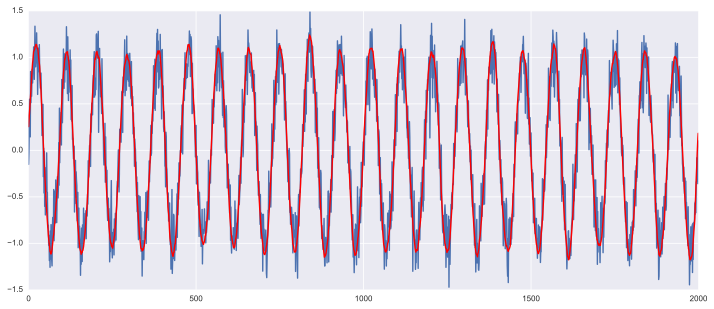

In [123]:
lim = (0, 2000)
sns.tsplot(wavstream[lim[0]:lim[1]])
sns.tsplot(wavstream.filter(20, 0.5, 10)[lim[0]:lim[1]], color='r')
print('Length:', len(wavstream))
print('Quality:', check.sum()/len(check))